Diabetes against all ML
In this project, will test all what we studied about classifications in the ML class using the diabetes dataset.

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso,LogisticRegression
from sklearn.metrics import precision_score,recall_score,roc_curve,f1_score,precision_recall_curve,roc_auc_score
from tensorflow import keras
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from matplotlib import style

import numpy as np
%matplotlib inline
style.use("ggplot")

In [2]:
df=pd.read_csv("diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### PCA
First we start with PCA. Using PCA, show the importance of each of the PCA dimensions on a bar plot. What is a reasonable number of dimensions in your opinion to obtain at least 95% explained_var_ratio?

Text(0.5, 1.0, 'PCA Feature Importance with Dimensions=2')

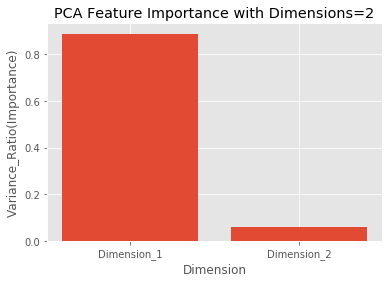

In [3]:
X=df.drop("Outcome",1)
y=df["Outcome"]
pca_2=PCA(2)
pca_3=PCA(3)
pca_4=PCA(4)
pca_8=PCA(8)
X_2=pca_2.fit_transform(X,y)
X_3=pca_3.fit_transform(X,y)
X_4=pca_4.fit_transform(X,y)
X_8=pca_8.fit_transform(X,y)
var_2=pca_2.explained_variance_ratio_
var_3=pca_3.explained_variance_ratio_
var_4=pca_4.explained_variance_ratio_
var_8=pca_8.explained_variance_ratio_
plt.bar(["Dimension_1","Dimension_2"],var_2)
plt.xlabel("Dimension")
plt.ylabel("Variance_Ratio(Importance)")
plt.title("PCA Feature Importance with Dimensions=2")

Text(0.5, 1.0, 'PCA Feature Importance with Dimensions=3')

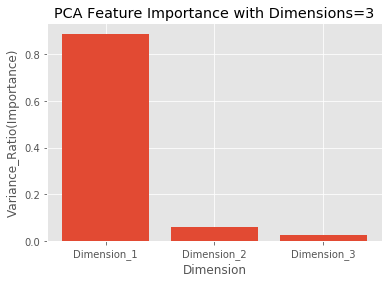

In [4]:
plt.bar(["Dimension_1","Dimension_2","Dimension_3"],var_3)
plt.xlabel("Dimension")
plt.ylabel("Variance_Ratio(Importance)")
plt.title("PCA Feature Importance with Dimensions=3")

Text(0.5, 1.0, 'PCA Feature Importance with Dimensions=4')

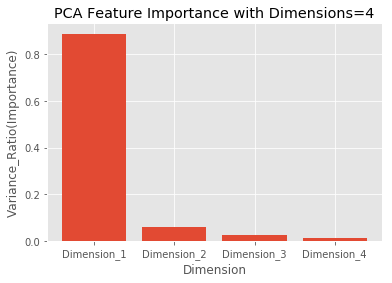

In [5]:
plt.bar(["Dimension_1","Dimension_2","Dimension_3","Dimension_4"],var_4)
plt.xlabel("Dimension")
plt.ylabel("Variance_Ratio(Importance)")
plt.title("PCA Feature Importance with Dimensions=4")

Text(0.5, 1.0, 'PCA Feature Importance with Dimensions=8')

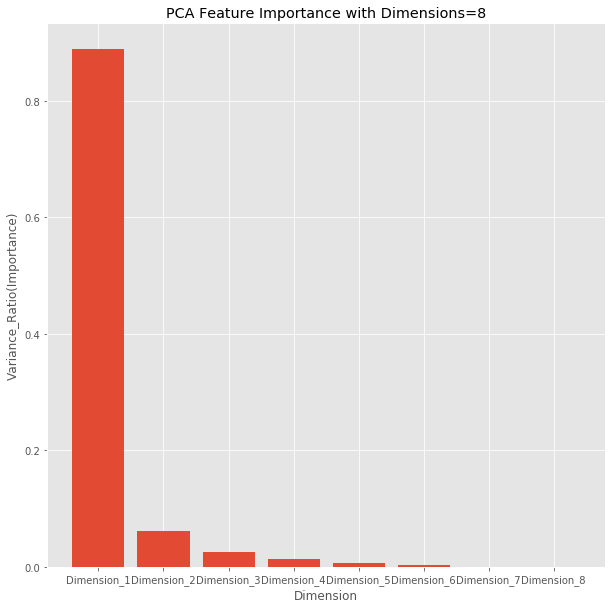

In [6]:
plt.figure(figsize=(10,10))
plt.bar(["Dimension_1","Dimension_2","Dimension_3","Dimension_4","Dimension_5","Dimension_6","Dimension_7",'Dimension_8']
        ,var_8)
plt.xlabel("Dimension")
plt.ylabel("Variance_Ratio(Importance)")
plt.title("PCA Feature Importance with Dimensions=8")

After running PCA analysis for a number of times with different dimensions,I believe 2 dimension are enough to explain about 95% of variance ratio in relation to the label, therefore my final conclusion is 2 dimensions.

## KMeans
Do clustering using KMeans on the original dataset (not the PCA) using K=2. Calculate Homogonity and Completeness score. Is that a good clustering?

In [7]:
from sklearn.metrics import homogeneity_completeness_v_measure
clf=KMeans(n_clusters=2)
clf.fit(X)
y_pred=clf.predict(X)
homogeneity,completeness ,v_measure =homogeneity_completeness_v_measure(y,y_pred)
print("The homogeneity score is",homogeneity)
print("The completeness score is",completeness)

The homogeneity score is 0.026659254297179365
The completeness score is 0.0331406091804888


Both the Homogeneity and completeness score are below par, a good score must be closer to one but both of these scores are really low which is indicative of the fact that Kmeans with only 2 cluster do not give justice to the given dataset, as most possibly, the distribution of feature might be reflected by more than 2 clusters

### Split the data
Split the original dataset (not the PCA) to have 30% test data

In [8]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3)

### Logistic Regression
Using LR, what is the accuracy, precision and recall and F1 score for the training and the test data? Plot the ROC curve

C:\Users\MMOHTASHIM\Anaconda3\envs\env_full\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The accuracy of Logistic Regression(testing) is: 0.7792207792207793
The accuracy of Logistic Regression(training) is: 0.7653631284916201
The precision of Logistic Regression(training) is: 0.7214285714285714
The precision of Logistic Regression(testing) is: 0.7457627118644068
The recall of Logistic Regression(training) is: 0.5372340425531915
The recall of Logistic Regression(testing) is: 0.55
The f1 score of Logistic Regression(training) is: 0.6158536585365854
The f1 score of Logistic Regression(testing) is: 0.6330935251798562


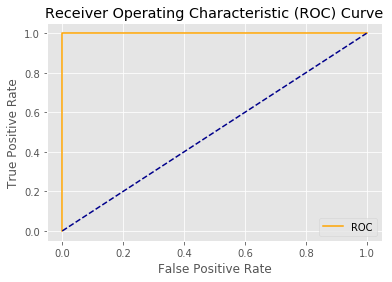

In [9]:
clf=LogisticRegression()
clf.fit(X_train,y_train)
y_pred_train=clf.predict(X_train)
y_pred_test=clf.predict(X_test)
y_pred=clf.predict(X)
probs=clf.predict_proba(X)[:,1]
print("The accuracy of Logistic Regression(testing) is:",clf.score(X_test,y_test))
print("The accuracy of Logistic Regression(training) is:",clf.score(X_train,y_train))
print("The precision of Logistic Regression(training) is:",precision_score(y_train,y_pred_train))
print("The precision of Logistic Regression(testing) is:",precision_score(y_test,y_pred_test))
print("The recall of Logistic Regression(training) is:",recall_score(y_train,y_pred_train))
print("The recall of Logistic Regression(testing) is:",recall_score(y_test,y_pred_test))
print("The f1 score of Logistic Regression(training) is:",f1_score(y_train,y_pred_train))
print("The f1 score of Logistic Regression(testing) is:",f1_score(y_test,y_pred_test))
##Now drawing roc curve
fpr, tpr, thresholds = roc_curve(y_pred, probs)

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


plot the test precision curve and accuracy curve for decision thresholds between 0.1 to 1 with a step of 0.1

(0, 1)

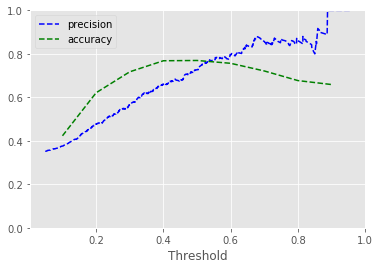

In [10]:
##plotting accuracy requires a little more work
df=pd.DataFrame()
df["thresholds"]=probs
df["actual_labels"]=y
accuracy=[]
threshold=np.arange(0.1,1,.1).tolist()
for i in threshold:
    df["predicted_labels"]=np.where(df["thresholds"]>=i,1,0)
    df["Correct"]=df["actual_labels"]==df["predicted_labels"]
    correct=len(df[(df["Correct"]==True)])
    accuracy.append(correct/len(df))

precisions, recalls, thresholds = precision_recall_curve(y, probs)
plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
plt.plot(threshold, accuracy, 'g--', label = 'accuracy')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])


## Deep Neural Networks
Using Keras, build a DNN that has better accuracy than LR. What is the accuracy, precision and recall and F1 score for the training and the test data? Plot the ROC curve?

C:\Users\MMOHTASHIM\Anaconda3\envs\env_full\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\MMOHTASHIM\Anaconda3\envs\env_full\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\MMOHTASHIM\Anaconda3\envs\env_full\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


Train on 537 samples, validate on 231 samples
Epoch 1/500
537/537 [==============================] - 0s 754us/sample - loss: 11.9405 - accuracy: 0.5698 - val_loss: 0.8336 - val_accuracy: 0.4113
Epoch 2/500
537/537 [==============================] - 0s 100us/sample - loss: 3.9683 - accuracy: 0.5978 - val_loss: 0.7657 - val_accuracy: 0.4892
Epoch 3/500
537/537 [==============================] - 0s 102us/sample - loss: 2.1102 - accuracy: 0.5903 - val_loss: 0.7385 - val_accuracy: 0.5238
Epoch 4/500
537/537 [==============================] - 0s 95us/sample - loss: 1.6108 - accuracy: 0.5754 - val_loss: 0.7230 - val_accuracy: 0.5195
Epoch 5/500
537/537 [==============================] - 0s 80us/sample - loss: 1.1774 - accuracy: 0.6145 - val_loss: 0.7062 - val_accuracy: 0.5498
Epoch 6/500
537/537 [==============================] - 0s 80us/sample - loss: 1.1508 - accuracy: 0.6145 - val_loss: 0.7020 - val_accuracy: 0.5758
Epoch 7/500
537/537 [==============================] - 0s 86us/sample - lo

537/537 [==============================] - 0s 154us/sample - loss: 0.5904 - accuracy: 0.7300 - val_loss: 1.0246 - val_accuracy: 0.6537
Epoch 57/500
537/537 [==============================] - 0s 123us/sample - loss: 0.7083 - accuracy: 0.6909 - val_loss: 1.0354 - val_accuracy: 0.6537
Epoch 58/500
537/537 [==============================] - 0s 147us/sample - loss: 0.6265 - accuracy: 0.7039 - val_loss: 1.0364 - val_accuracy: 0.6537
Epoch 59/500
537/537 [==============================] - 0s 95us/sample - loss: 0.5477 - accuracy: 0.7561 - val_loss: 1.0491 - val_accuracy: 0.6537
Epoch 60/500
537/537 [==============================] - 0s 130us/sample - loss: 0.5868 - accuracy: 0.7151 - val_loss: 1.0565 - val_accuracy: 0.6537
Epoch 61/500
537/537 [==============================] - 0s 114us/sample - loss: 0.6977 - accuracy: 0.6965 - val_loss: 1.0654 - val_accuracy: 0.6537
Epoch 62/500
537/537 [==============================] - 0s 115us/sample - loss: 0.5950 - accuracy: 0.7263 - val_loss: 1.0809 -

Epoch 111/500
537/537 [==============================] - 0s 128us/sample - loss: 0.6254 - accuracy: 0.7356 - val_loss: 1.4222 - val_accuracy: 0.6537
Epoch 112/500
537/537 [==============================] - 0s 158us/sample - loss: 0.5475 - accuracy: 0.7430 - val_loss: 1.4243 - val_accuracy: 0.6537
Epoch 113/500
537/537 [==============================] - 0s 123us/sample - loss: 0.5083 - accuracy: 0.7654 - val_loss: 1.4294 - val_accuracy: 0.6537
Epoch 114/500
537/537 [==============================] - 0s 101us/sample - loss: 0.5481 - accuracy: 0.7728 - val_loss: 1.4436 - val_accuracy: 0.6537
Epoch 115/500
537/537 [==============================] - 0s 115us/sample - loss: 0.5170 - accuracy: 0.7728 - val_loss: 1.4582 - val_accuracy: 0.6537
Epoch 116/500
537/537 [==============================] - 0s 102us/sample - loss: 0.6515 - accuracy: 0.7281 - val_loss: 1.4555 - val_accuracy: 0.6537
Epoch 117/500
537/537 [==============================] - 0s 128us/sample - loss: 0.5357 - accuracy: 0.7337

Epoch 166/500
537/537 [==============================] - 0s 102us/sample - loss: 0.4695 - accuracy: 0.7803 - val_loss: 1.7195 - val_accuracy: 0.6537
Epoch 167/500
537/537 [==============================] - 0s 127us/sample - loss: 0.4768 - accuracy: 0.7654 - val_loss: 1.7384 - val_accuracy: 0.6537
Epoch 168/500
537/537 [==============================] - 0s 106us/sample - loss: 0.5945 - accuracy: 0.7467 - val_loss: 1.7244 - val_accuracy: 0.6537
Epoch 169/500
537/537 [==============================] - 0s 110us/sample - loss: 0.4814 - accuracy: 0.7635 - val_loss: 1.7124 - val_accuracy: 0.6537
Epoch 170/500
537/537 [==============================] - 0s 89us/sample - loss: 0.5543 - accuracy: 0.7579 - val_loss: 1.7100 - val_accuracy: 0.6537
Epoch 171/500
537/537 [==============================] - 0s 84us/sample - loss: 0.4845 - accuracy: 0.7877 - val_loss: 1.7326 - val_accuracy: 0.6537
Epoch 172/500
537/537 [==============================] - 0s 80us/sample - loss: 0.4938 - accuracy: 0.7635 - 

537/537 [==============================] - 0s 78us/sample - loss: 0.4527 - accuracy: 0.7952 - val_loss: 1.9385 - val_accuracy: 0.6537
Epoch 222/500
537/537 [==============================] - 0s 78us/sample - loss: 0.4392 - accuracy: 0.7784 - val_loss: 1.9427 - val_accuracy: 0.6537
Epoch 223/500
537/537 [==============================] - 0s 80us/sample - loss: 0.4358 - accuracy: 0.8007 - val_loss: 1.9523 - val_accuracy: 0.6537
Epoch 224/500
537/537 [==============================] - 0s 91us/sample - loss: 0.4402 - accuracy: 0.7840 - val_loss: 1.9670 - val_accuracy: 0.6537
Epoch 225/500
537/537 [==============================] - 0s 82us/sample - loss: 0.4568 - accuracy: 0.7784 - val_loss: 1.9649 - val_accuracy: 0.6537
Epoch 226/500
537/537 [==============================] - 0s 86us/sample - loss: 0.4613 - accuracy: 0.7765 - val_loss: 1.9661 - val_accuracy: 0.6537
Epoch 227/500
537/537 [==============================] - 0s 87us/sample - loss: 0.4585 - accuracy: 0.7840 - val_loss: 1.9660 -

537/537 [==============================] - 0s 80us/sample - loss: 0.4490 - accuracy: 0.7784 - val_loss: 2.1122 - val_accuracy: 0.6537
Epoch 277/500
537/537 [==============================] - 0s 76us/sample - loss: 0.5222 - accuracy: 0.7449 - val_loss: 2.0925 - val_accuracy: 0.6537
Epoch 278/500
537/537 [==============================] - 0s 89us/sample - loss: 0.4897 - accuracy: 0.7542 - val_loss: 2.0992 - val_accuracy: 0.6537
Epoch 279/500
537/537 [==============================] - 0s 80us/sample - loss: 0.4428 - accuracy: 0.7877 - val_loss: 2.1094 - val_accuracy: 0.6537
Epoch 280/500
537/537 [==============================] - 0s 82us/sample - loss: 0.4745 - accuracy: 0.7635 - val_loss: 2.1025 - val_accuracy: 0.6537
Epoch 281/500
537/537 [==============================] - 0s 74us/sample - loss: 0.4485 - accuracy: 0.7728 - val_loss: 2.1122 - val_accuracy: 0.6537
Epoch 282/500
537/537 [==============================] - 0s 86us/sample - loss: 0.4467 - accuracy: 0.7877 - val_loss: 2.1158 -

537/537 [==============================] - 0s 102us/sample - loss: 0.4612 - accuracy: 0.7933 - val_loss: 2.2605 - val_accuracy: 0.6537
Epoch 332/500
537/537 [==============================] - 0s 91us/sample - loss: 0.4592 - accuracy: 0.7803 - val_loss: 2.2815 - val_accuracy: 0.6537
Epoch 333/500
537/537 [==============================] - 0s 80us/sample - loss: 0.4562 - accuracy: 0.7989 - val_loss: 2.2850 - val_accuracy: 0.6537
Epoch 334/500
537/537 [==============================] - 0s 76us/sample - loss: 0.4768 - accuracy: 0.7542 - val_loss: 2.2869 - val_accuracy: 0.6537
Epoch 335/500
537/537 [==============================] - 0s 89us/sample - loss: 0.4652 - accuracy: 0.7691 - val_loss: 2.3018 - val_accuracy: 0.6537
Epoch 336/500
537/537 [==============================] - 0s 78us/sample - loss: 0.4575 - accuracy: 0.7821 - val_loss: 2.2808 - val_accuracy: 0.6537
Epoch 337/500
537/537 [==============================] - 0s 97us/sample - loss: 0.4635 - accuracy: 0.7709 - val_loss: 2.2873 

537/537 [==============================] - 0s 76us/sample - loss: 0.4336 - accuracy: 0.7821 - val_loss: 2.2907 - val_accuracy: 0.6537
Epoch 387/500
537/537 [==============================] - 0s 87us/sample - loss: 0.4295 - accuracy: 0.7840 - val_loss: 2.2620 - val_accuracy: 0.6537
Epoch 388/500
537/537 [==============================] - 0s 80us/sample - loss: 0.4556 - accuracy: 0.7933 - val_loss: 2.2834 - val_accuracy: 0.6537
Epoch 389/500
537/537 [==============================] - 0s 84us/sample - loss: 0.4288 - accuracy: 0.8007 - val_loss: 2.2968 - val_accuracy: 0.6537
Epoch 390/500
537/537 [==============================] - 0s 84us/sample - loss: 0.4443 - accuracy: 0.7747 - val_loss: 2.2722 - val_accuracy: 0.6537
Epoch 391/500
537/537 [==============================] - 0s 106us/sample - loss: 0.4242 - accuracy: 0.7952 - val_loss: 2.3134 - val_accuracy: 0.6537
Epoch 392/500
537/537 [==============================] - 0s 115us/sample - loss: 0.4234 - accuracy: 0.7989 - val_loss: 2.3055

537/537 [==============================] - 0s 87us/sample - loss: 0.4618 - accuracy: 0.7747 - val_loss: 2.2883 - val_accuracy: 0.6494
Epoch 442/500
537/537 [==============================] - 0s 78us/sample - loss: 0.4208 - accuracy: 0.7970 - val_loss: 2.2996 - val_accuracy: 0.6494
Epoch 443/500
537/537 [==============================] - 0s 80us/sample - loss: 0.4275 - accuracy: 0.7933 - val_loss: 2.2897 - val_accuracy: 0.6494
Epoch 444/500
537/537 [==============================] - 0s 80us/sample - loss: 0.4367 - accuracy: 0.7747 - val_loss: 2.3085 - val_accuracy: 0.6494
Epoch 445/500
537/537 [==============================] - 0s 84us/sample - loss: 0.4152 - accuracy: 0.8101 - val_loss: 2.3155 - val_accuracy: 0.6494
Epoch 446/500
537/537 [==============================] - 0s 84us/sample - loss: 0.4534 - accuracy: 0.7877 - val_loss: 2.3607 - val_accuracy: 0.6494
Epoch 447/500
537/537 [==============================] - 0s 74us/sample - loss: 0.4439 - accuracy: 0.7970 - val_loss: 2.2970 -

537/537 [==============================] - 0s 100us/sample - loss: 0.4322 - accuracy: 0.7821 - val_loss: 2.3802 - val_accuracy: 0.6494
Epoch 497/500
537/537 [==============================] - 0s 108us/sample - loss: 0.4716 - accuracy: 0.7728 - val_loss: 2.3994 - val_accuracy: 0.6494
Epoch 498/500
537/537 [==============================] - 0s 76us/sample - loss: 0.4764 - accuracy: 0.7728 - val_loss: 2.3114 - val_accuracy: 0.6494
Epoch 499/500
537/537 [==============================] - 0s 80us/sample - loss: 0.4294 - accuracy: 0.7803 - val_loss: 2.3627 - val_accuracy: 0.6494
Epoch 500/500
231/231 [==============================] - 0s 48us/sample - loss: 0.5526 - accuracy: 0.7403
The accuracy of Deep Neural Networks(testing) is: 0.74025977
537/537 [==============================] - 0s 39us/sample - loss: 0.4229 - accuracy: 0.7914
The accuracy of Deep Neural Networks(training) is: 0.7914339
The precision of Deep Neural Networks(training) is: 0.8275862068965517
The precision of Deep Neural 

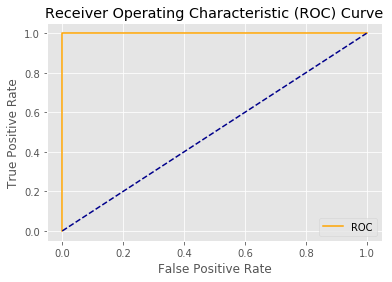

In [11]:
from tensorflow.keras import layers

normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

clf = keras.Sequential([
    layers.Dense(12, input_shape=(8,), activation="relu"),
    layers.Dense(2, activation="softmax")
])

clf.compile(keras.optimizers.Adam(lr = .009), loss='sparse_categorical_crossentropy', metrics=["accuracy"])
clf.fit(X_train, y_train, validation_data=(X_test_norm, y_test),epochs=500)

y_pred_train=clf.predict_classes(X_train)
y_pred_test=clf.predict_classes(X_test)
y_pred=clf.predict_classes(X)

probs=clf.predict_proba(X)[:,1]
print("The accuracy of Deep Neural Networks(testing) is:",clf.evaluate(X_test,y_test)[-1])
print("The accuracy of Deep Neural Networks(training) is:",clf.evaluate(X_train,y_train)[-1])
print("The precision of Deep Neural Networks(training) is:",precision_score(y_train,y_pred_train))
print("The precision of Deep Neural Networks(testing) is:",precision_score(y_test,y_pred_test))
print("The recall of Deep Neural Networks(training) is:",recall_score(y_train,y_pred_train))
print("The recall of Deep Neural Networks(testing) is:",recall_score(y_test,y_pred_test))
print("The f1 score of Deep Neural Networks(training) is:",f1_score(y_train,y_pred_train))
print("The f1 score of Deep Neural Networks(testing) is:",f1_score(y_test,y_pred_test))


##Now drawing roc curve
fpr, tpr, thresholds = roc_curve(y_pred, probs)

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()



plot the test precision curve  and accuracy curve for decision thresholds between 0.1 to 1 with a step of 0.1

(0, 1)

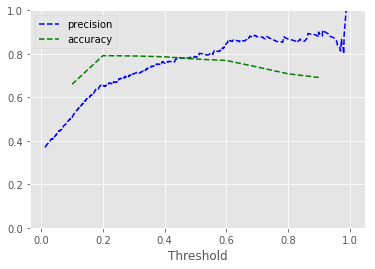

In [12]:
##using same techinque for deep learning
df=pd.DataFrame()
df["thresholds"]=probs
df["actual_labels"]=y
accuracy=[]
threshold=np.arange(0.1,1,.1).tolist()
for i in threshold:
    df["predicted_labels"]=np.where(df["thresholds"]>=i,1,0)
    df["Correct"]=df["actual_labels"]==df["predicted_labels"]
    correct=len(df[(df["Correct"]==True)])
    accuracy.append(correct/len(df))

precisions, recalls, thresholds = precision_recall_curve(y, probs)
plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
plt.plot(threshold, accuracy, 'g--', label = 'accuracy')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])


## Random Forest
Build a random forest with `n_estimators=100`. What is the accuracy, precision and recall and F1 score for the training and the test data? Plot the ROC curve? Is the model overfitting

The accuracy of Random Forest(testing) is: 0.7359307359307359
The accuracy of Random Forest(training) is: 1.0
The precision of Random Forest(training) is: 1.0
The precision of Random Forest(testing) is: 0.6301369863013698
The recall of Random Forest(training) is: 1.0
The recall of Random Forest(testing) is: 0.575
The f1 score of Random Forest(training) is: 1.0
The f1 score of Random Forest(testing) is: 0.6013071895424835


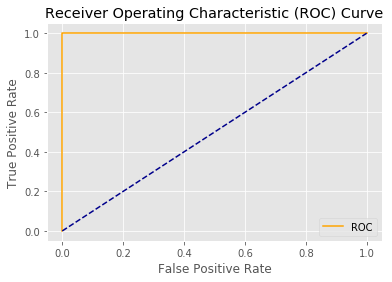

In [13]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred_train=clf.predict(X_train)
y_pred_test=clf.predict(X_test)
y_pred=clf.predict(X)
probs=clf.predict_proba(X)[:,1]
print("The accuracy of Random Forest(testing) is:",clf.score(X_test,y_test))
print("The accuracy of Random Forest(training) is:",clf.score(X_train,y_train))
print("The precision of Random Forest(training) is:",precision_score(y_train,y_pred_train))
print("The precision of Random Forest(testing) is:",precision_score(y_test,y_pred_test))
print("The recall of Random Forest(training) is:",recall_score(y_train,y_pred_train))
print("The recall of Random Forest(testing) is:",recall_score(y_test,y_pred_test))
print("The f1 score of Random Forest(training) is:",f1_score(y_train,y_pred_train))
print("The f1 score of Random Forest(testing) is:",f1_score(y_test,y_pred_test))
##Now drawing roc curve
fpr, tpr, thresholds = roc_curve(y_pred, probs)

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

I would suggest ,it is overfitting due to a prefect score of 1 in training phase which is reflective of an overfitting model

build another model to limit the overfitting problem by using `n_estimators=1000, max_depth=8` as your random forest parameters. Is the overfitting better now?

The accuracy of Random Forest(testing) is: 0.7445887445887446
The accuracy of Random Forest(training) is: 0.9720670391061452
The precision of Random Forest(training) is: 0.9942857142857143
The precision of Random Forest(testing) is: 0.6438356164383562
The recall of Random Forest(training) is: 0.925531914893617
The recall of Random Forest(testing) is: 0.5875
The f1 score of Random Forest(training) is: 0.9586776859504131
The f1 score of Random Forest(testing) is: 0.6143790849673203


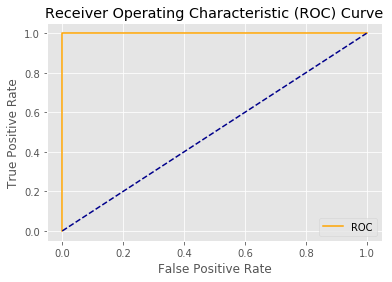

In [14]:
clf=RandomForestClassifier(n_estimators=100,max_depth=8)
clf.fit(X_train,y_train)
y_pred_train=clf.predict(X_train)
y_pred_test=clf.predict(X_test)
y_pred=clf.predict(X)
probs=clf.predict_proba(X)[:,1]
print("The accuracy of Random Forest(testing) is:",clf.score(X_test,y_test))
print("The accuracy of Random Forest(training) is:",clf.score(X_train,y_train))
print("The precision of Random Forest(training) is:",precision_score(y_train,y_pred_train))
print("The precision of Random Forest(testing) is:",precision_score(y_test,y_pred_test))
print("The recall of Random Forest(training) is:",recall_score(y_train,y_pred_train))
print("The recall of Random Forest(testing) is:",recall_score(y_test,y_pred_test))
print("The f1 score of Random Forest(training) is:",f1_score(y_train,y_pred_train))
print("The f1 score of Random Forest(testing) is:",f1_score(y_test,y_pred_test))
##Now drawing roc curve
fpr, tpr, thresholds = roc_curve(y_pred, probs)

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Training score is away from prefect which suggest hint of regularization due to max_dept parameter ,therefore yes overfitting is better but by an minimal amount. A better option would be to decrease the number of trees in the random forest or yet further reduce the depth of forest which will further generalize our model.

plot the test precision curve  and accuracy curve for decision thresholds between 0.1 to 1 with a step of 0.1

(0, 1)

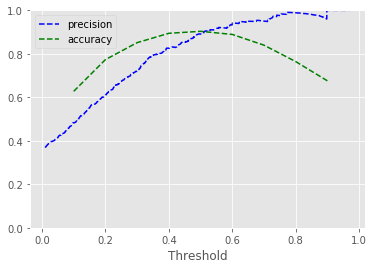

In [15]:
##using same techinque for deep learning
df=pd.DataFrame()
df["thresholds"]=probs
df["actual_labels"]=y
accuracy=[]
threshold=np.arange(0.1,1,.1).tolist()
for i in threshold:
    df["predicted_labels"]=np.where(df["thresholds"]>=i,1,0)
    df["Correct"]=df["actual_labels"]==df["predicted_labels"]
    correct=len(df[(df["Correct"]==True)])
    accuracy.append(correct/len(df))

precisions, recalls, thresholds = precision_recall_curve(y, probs)
plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
plt.plot(threshold, accuracy, 'g--', label = 'accuracy')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])

# Finally: 
- Write a few lines about each of the three models and if there is one superior model and why do you think so?

1-LogisticRegression-It has a good accuracy in the testing phase and recall,precision are also not too bad. However,NN performed better due to the way I designed its architecture.Further the model is not overfiiting which is shown by the respective training score. Further,logisitic regression seems logical in this particular context, as we have two classes annd the distribution of both classes are almost same so Logistic Regression which uses a threshold of 0.5 seems fair in this context and prehaps this is the reason why it is performing above par.Moreover f1 score is also not too bad which suggest better capitalization of the data.

2-Deep Neural Network-Accuracy is more than Logistic Regression which is expected because Deep Learning is used for low-level feature extraction but the data given is too simple for Neural Network architecture(which has been effectively choosen for the specific context). However, what suprised me is that it is not overfitting which might be because I am not using too much epochs. Note that Deep Learning is performing better because of its ability of learning low-level features and its effective design.

3-RandomForest-Clearly the model is overfitting as explained earlier. The fact that its testing accuracy is aknost similar to logistic regression and NNs but training score is 1.0,means model is worse in terms of generalization and capitilization.All other indicators seems to suggest the same story.

Note that in threshold graph accuracy starts to decrease after the threshold of 0.5 which suggest 0.5 is the best threshold to classify the data. Given Logistic Regression inherently works with this threshold means the model is best and this conclusion is complemented by the reasons explained earlier. However, you might ask why despite its better performance I did not choose Neural Nets for the task, the reason is simple: the classification is simple and does not need such low-level implementation. Moreover NN beats logistic regression by minimal amount so there is no need to go into the extra hussle.